NAMA  : Nicholaus verdhy

KELAS : PYTN-KS11-023

TUGAS : ASSIGMENT 3

# Import Library

>pandas: digunakan untuk manipulasi data dan analisis data.

>numpy: digunakan untuk komputasi numerik pada data.

>matplotlib: digunakan untuk visualisasi data dengan grafik.

>seaborn: digunakan untuk membuat grafik dan visualisasi data statistik yang lebih kompleks.

>sklearn: digunakan untuk pemrosesan data, pembelajaran mesin, dan evaluasi model.

>LabelEncoder: digunakan untuk mengkodekan variabel kategori menjadi nilai numerik.

>StandardScaler: digunakan untuk melakukan penskalaan data.

>LogisticRegression: digunakan untuk membuat model regresi logistik.

>train_test_split: digunakan untuk membagi data menjadi data latih dan data uji.

>accuracy_score: digunakan untuk menghitung akurasi model.

>RandomForestClassifier: digunakan untuk membuat model random forest.

>DecisionTreeClassifier: digunakan untuk membuat model decision tree.

>GaussianNB: digunakan untuk membuat model naive bayes.

>KNeighborsClassifier: digunakan untuk membuat model k-nearest neighbors.

>svm: digunakan untuk membuat model support vector machine.

>SVC: digunakan untuk membuat model support vector classification.

>StringIO: digunakan untuk membaca dan menulis file string seperti file teks biasa.

>Image: digunakan untuk menampilkan gambar.

>tree: digunakan untuk membuat model decision tree.

>pydotplus: digunakan untuk membuat grafik decision tree dengan menggunakan library Graphviz.

In [2]:
# digunakan untuk dataframe
import pandas as pd
import numpy as np

# digunakan untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# digunakan untuk explorisasi data
from sklearn.preprocessing import LabelEncoder, StandardScaler

# digunakan untuk modeling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import sklearn.tree as DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Import dan memanggil dataset

Kita gunakan read_csv untuk memanggil datanya

In [3]:
df = pd.read_csv("bank.csv", sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Mari kita lihat tipe datanya

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# Data cleansing

mari kita lihat untuk ukuran datanya

In [5]:
df.shape

(4521, 17)

Data terdiri dari 45211 baris dan 17 kolom

=============================

mari kita lihat nilai deskriptiv statstik nya

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Kita lihat 5 data teratas dan 5 data terbawah menggunakan head() dan tail()

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


Sekarang kita merubah kolom "y" menjadi kolom bernama "ResponClient"


In [9]:
df = df.rename(columns={"y":'ResponClient'})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,ResponClient
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Sekarang kita lihat data yang missing value

In [10]:
df.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
ResponClient    0
dtype: int64

Tidak ada data yang missing value, lalu kita cek data yang terduplkikat

In [11]:
df.duplicated().sum()

0

Karena dirasa sudah siap datanya, tidak ada missing value maupun data duplikat kita masuk kedalam Exploratory Data Analysis

#  Exploratory Data Analysis

## Visualisasi Data

Rumusan Masalah

> Berapakah jumlah client yang ingin bergabung dengan deposit ini? Apakah diatas 50%?

> Apa mayoritas pekerjaan orang yang mengisi data ini?

###  Berapa Jumlah Client yang ingin bergabung dengan deposit ini? Apakah diatas 50%?

Sekarang kita akan menghitung jumlah Yes dan No pada data diatas

In [12]:
jawaban_client = pd.DataFrame({"Jumlah Jawaban":df["ResponClient"].value_counts()})
jawaban_client

,Jumlah Jawaban
no,4000
yes,521


Ternyata dari data diatas dapat disimpulkan bahwa banyak client yang tidak ingin bergabung sebanyak 39922 orang dan 5289. Tandanya tidak ada 50% orang yang ingin bergabung kedalam deposit berjangka ini

Untuk lebih jelas lagi melihatnya mari kita gunakan Histrogram untuk menunjukan jumlah nya, dan persentasenya persen menggunakan pie chart

masukan data yang ingin di persentasekan

In [13]:
data_jumlah_yesno = jawaban_client["Jumlah Jawaban"] #mengunci data pada kolom jumlah jawaban

Mari kita lihat menggunakan Histogram

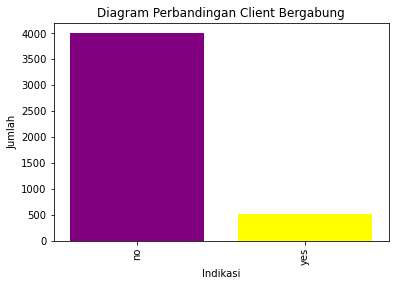

In [14]:
label=["YES","NO"]
data_jumlah_yesno.plot(kind="bar")
plt.bar(label,data_jumlah_yesno, color=['purple', 'yellow'])
plt.title('Diagram Perbandingan Client Bergabung') #judul
plt.xlabel("Indikasi")
plt.ylabel("Jumlah")
plt.show() #tampilkan

Mari kita lihat poersentasenya dalam PIE CHARTT

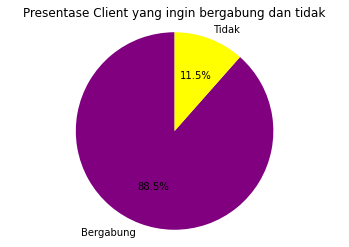

In [15]:
# Plot pie chart
plt.pie(data_jumlah_yesno, labels=["Bergabung","Tidak"], autopct='%1.1f%%', startangle=90, colors=['purple',"yellow"])

# Mengatur aspek proporsi pie chart menjadi sama agar terlihat bulat
plt.axis('equal')

# Menambahkan judul
plt.title('Presentase Client yang ingin bergabung dan tidak')

# Menampilkan pie chart
plt.show()

_Kesimpulan_
Bisa kita lihat pada chart bar dan pie chart, mayoritas orang tidak ingin bergabung dalam deposit berjang ini, Persentasenya 88.3% : 11.7% dengan 39922 : 5289 orang 

###  Apa mayoritas pekerjaan orang yang mengisi data ini?

Sekarang kita akan melihat berapa persentase tiap pekerjaannya

In [16]:
totaljob=df["job"].value_counts().sort_values()
totaljob

unknown           38
student           84
housemaid        112
unemployed       128
entrepreneur     168
self-employed    183
retired          230
services         417
admin.           478
technician       768
blue-collar      946
management       969
Name: job, dtype: int64

Bisa kita lihat data tertinggi ada pada blue-collar. Sekarang kita lihat menggunakan Barchart lagi

<AxesSubplot:>

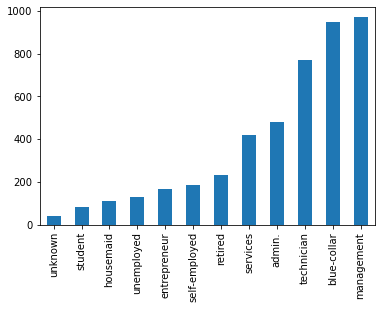

In [17]:
totaljob.plot(kind="bar")

_keterangan_
Brati bisa kita liohat bahwa Blue-collar adalah mayoritas pekerjaan yang mengisi data ini

Sekarang kita akan masuk kedalam permodelannya

# Preprocesing Data

Sebelum memasuki permodelannya, mari kita ubah tipe data objek ke dalam bnt int, karena ML tidak dapat memproses data yang string, Jadi harus kita ubah kedalam numerical dengan encoder

## Encode

In [18]:
#creating labelEncoder

# preprocessing.LabelEncoder() digunakan untuk membuat objek LabelEncoder yang akan digunakan untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

# mengambil tipe data object pada dataset dan di simpan di df_new
df_category = df.select_dtypes(include='object')
df_new = df.copy()

for column in df_category.columns:
    df_new[column] = label_encoder.fit_transform(df[column])

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           4521 non-null   int64
 1   job           4521 non-null   int32
 2   marital       4521 non-null   int32
 3   education     4521 non-null   int32
 4   default       4521 non-null   int32
 5   balance       4521 non-null   int64
 6   housing       4521 non-null   int32
 7   loan          4521 non-null   int32
 8   contact       4521 non-null   int32
 9   day           4521 non-null   int64
 10  month         4521 non-null   int32
 11  duration      4521 non-null   int64
 12  campaign      4521 non-null   int64
 13  pdays         4521 non-null   int64
 14  previous      4521 non-null   int64
 15  poutcome      4521 non-null   int32
 16  ResponClient  4521 non-null   int32
dtypes: int32(10), int64(7)
memory usage: 424.0 KB


Jika semua data sudah berubah ke int, maka dari itu sudah bisa diolah oleh ML, sekrang mari kita lihat 5 ndata teratas

In [20]:
df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,ResponClient
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


Bisa kita lihat data diatas, jaraknya jauh. Seperti 261 dengan 1 dan lainnya. Maka dari itu kita lakukan Standardization

## Standarzation

In [21]:
scaler = preprocessing.StandardScaler()# membuat objek StandardScaler utuk melakukan scaling pada setiap kolom numerik
scale_df = df_new.copy()# copy data frame df_new dan simpan pada scale_df

# setiap kolom diubah nilainya dengan method fit_trasnform() dan hasilnya disimpan pada numeric_df
numeric_df = df_new.select_dtypes(include=['int64','float64','int32'])
for column in numeric_df.columns:
  scale_df[column] = scaler.fit_transform(df_new[column].values.reshape(-1,1))

In [22]:
scale_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,ResponClient
0,-1.056270,1.716804,-0.246429,-1.644755,-0.130759,0.121072,-1.142051,-0.424756,-0.723642,0.374052,1.485414,-0.711861,-0.576829,-0.407218,-0.320413,0.444413,-0.360902
1,-0.772583,0.795246,-0.246429,-0.309038,-0.130759,1.118644,0.875617,2.354292,-0.723642,-0.596026,0.819288,-0.169194,-0.576829,2.989044,2.041734,-2.579961,-0.360902
2,-0.583458,-0.126313,1.421396,1.026680,-0.130759,-0.024144,0.875617,-0.424756,-0.723642,0.010273,-1.845220,-0.303898,-0.576829,2.899143,0.270124,-2.579961,-0.360902
3,-1.056270,-0.126313,-0.246429,1.026680,-0.130759,0.017726,0.875617,2.354292,1.495133,-1.566105,0.153161,-0.250017,0.387967,-0.407218,-0.320413,0.444413,-0.360902
4,1.686036,-1.047871,-0.246429,-0.309038,-0.130759,-0.472753,0.875617,-0.424756,1.495133,-1.323585,0.819288,-0.146102,-0.576829,-0.407218,-0.320413,0.444413,-0.360902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,0.795246,-0.246429,-0.309038,-0.130759,-0.583410,0.875617,-0.424756,-0.723642,1.707910,-0.179903,0.250315,0.709566,-0.407218,-0.320413,0.444413,-0.360902
4517,1.496912,0.488060,-0.246429,1.026680,7.647669,-1.573671,0.875617,2.354292,1.495133,-0.838546,0.819288,-0.427057,-0.576829,-0.407218,-0.320413,0.444413,-0.360902
4518,1.496912,1.409618,-0.246429,-0.309038,-0.130759,-0.374724,-1.142051,-0.424756,-0.723642,0.374052,-1.512157,-0.434754,2.639160,-0.407218,-0.320413,0.444413,-0.360902
4519,-1.245394,-1.047871,-0.246429,-0.309038,-0.130759,-0.094925,-1.142051,-0.424756,-0.723642,-1.202326,-0.846030,-0.519426,0.387967,1.710451,1.451197,-1.571836,-0.360902


Data diatas duah kita sudah di standarzation, skrg kita tampilkan nilai korelasi antar tabelnya. gunakan annot=True untuk menampilkan nilai korelasinya pada HEAT MAP

## HEATMAP

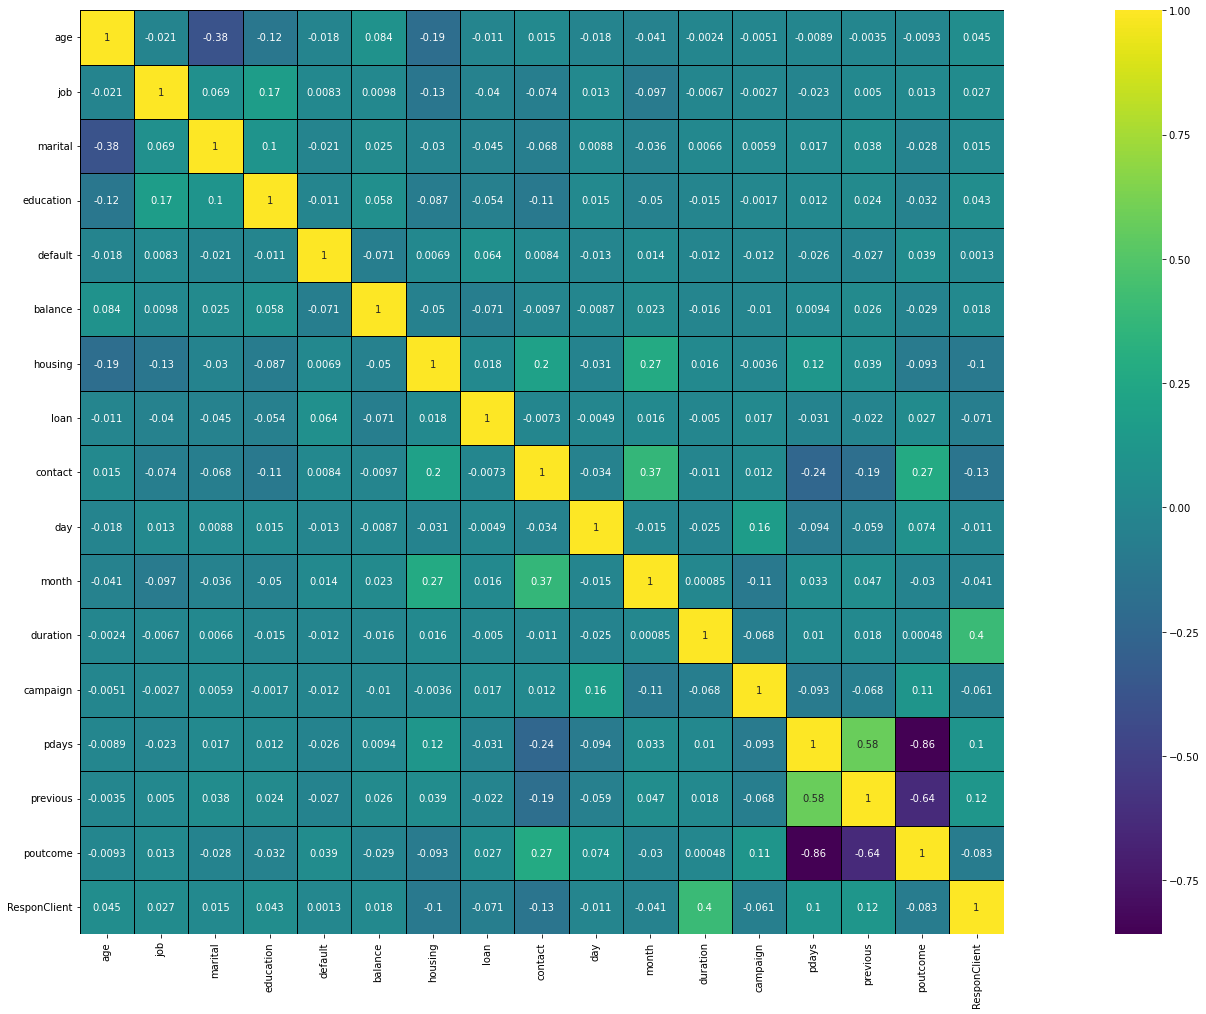

In [23]:

plt.figure(figsize=(40, 17))
ax = sns.heatmap(scale_df.corr(),annot=True, cmap='viridis', linewidths=.5, linecolor='black', square=True)


_KETERANGAN_

warna hijau muda atau kuning muda menunjukkan korelasi positif tinggi, 

sedangkan warna ungu atau biru tua menunjukkan korelasi negatif tinggi.

Sekarang kita masuk ke dalam MODELING

# MODELING IN MACHINE LEARNING

Model yang kita buat akan ada 7, diantaranya:

1. Logistic Regression
2. K-Nearest Neighbour
3. Support Vector Machine
4. Decision Tree
5. Random Forest
6. Naive Bayes
7. Confusion Matrix

Sebelum masuk ke modeling, mari kita tetapkan variabel X dan y nya
variable x adlaah variabel bebas, dan y terikat. Untuk y adalah Y_targer, dan sisanya X

In [24]:
x = df_new.iloc[:,0:16]
y = df_new.iloc[:,-1]

Setelah kita loc, mari kita lakukan pembagian trtaining dan testing. Nantinya pembagian testing dan trainignya dibagi sebebesar 25% testing dan 75 % training/

In [25]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=25, random_state=1)

## Logistic Regresion

Logistic Regresi ini adlaah modeling yang analisanya deangna hubugnan antara 2 variabel yang dependen dan idnependen. Guna dari Logistic Regressioin ini untuk prediksi nilai probabilitas dari sbuah kejadian yang biner atau sering kita jkumpai seperti ya tidak, berhasil gagal.

In [26]:
#karena sudah import sklearn diawal, tidak perlu import lagi

# menggunakan model1 sebagai penampung LOGISTIC REGRESION modeling
model1 = LogisticRegression()

# Melatih model pada data training
model1.fit(x_train, y_train)

# Memprediksi kelas Y_target pada data testing
model1_pred = model1.predict(x_test)

# Menghitung akurasi prediksi pada data testing
accuracyModel1 = accuracy_score(y_test, model1_pred)
print("Akurasi dari Model 1 ( Logistic Regression) sebesar:", accuracyModel1*100)

Akurasi dari Model 1 ( Logistic Regression) sebesar: 92.0


## K-NEAREST NEIGHBOUR

KNN adalah algoritma mesin yang digunakan untuk klasifikasi dan juga bisa untuk regresi. untuk KNN sendiri dia akan mencari nilai K tetangga terdekatnya dari data yang baru dan menentukan kelas/ nilai regresi untuk titik data baru berdasarkan mayoritas dari nilai K terdekat

In [27]:
# menggunakan model2 sebagai penampung KNN modeling
model2 = KNeighborsClassifier()

# Melatih model pada data training
model2.fit(x_train,y_train)

#memprediksi kelas Y_target pada data testing
model2_pred = model2.predict(x_test)

# Menghitung akurasi prediksi pada data testing
accuracyModel2 = accuracy_score(y_test,model2_pred)
print("Akurasi dari Model 2 (KNN) sebesar:", accuracyModel2*100)

Akurasi dari Model 2 (KNN) sebesar: 88.0


## Support Vector Machine (SVM)

SVM bekerja dengan mencari hyperplane (garis, bidang, atau ruang) terbaik untuk memisahkan data yang berbeda kelas atau nilai target pada sebuah ruang berdimensi tinggi. Hyperplane yang dipilih harus memaksimalkan jarak antara kelas yang berbeda sehingga dapat menghasilkan model yang akurat dan robust.

In [28]:
# Membuat objek SVM
model3 = SVC(kernel='linear')

# Melatih model pada data training
model3.fit(x_train, y_train)

# Memprediksi kelas target pada data testing
model3_pred = model3.predict(x_test)

# Menghitung akurasi prediksi pada data testing
accuracyModel3 = accuracy_score(y_test, model3_pred)
print("Akurasi dari Model 3 (SVM) sebesar:", accuracyModel3*100)

Akurasi dari Model 3 (SVM) sebesar: 80.0


## Decision Tree

Decision tree ini menghasilkan struktur pohon yang nantinya dapat digunakan untuk mengambil sebuah keputusan dengan menganalisis fitur fitur pada data yang ada.

In [29]:
from sklearn.tree import DecisionTreeClassifier
# Membuat objek Decision Tree
model4 = DecisionTreeClassifier()

# Melatih model pada data training
model4.fit(x_train, y_train)

# Memprediksi kelas target pada data testing
model4_pred = model4.predict(x_test)

# Menghitung akurasi prediksi pada data testing
accuracyModel4 = accuracy_score(y_test, model4_pred)
print("Akurasi dari Model 4 (Decision Tree) sebesar:", accuracyModel4*100)

Akurasi dari Model 4 (Decision Tree) sebesar: 84.0


## Random Forest

Random Forest adalah algortima yang membangun ebberapa pohon keputusan yang secara acak pada dataset yang tealh kita berikan. Nantinya akan digabungkan hasil prediksi dari masiong masing poohn untuk prediksi ahkir

In [30]:
# Membuat objek DRandom Forest dengan 100 pohon
model5 = RandomForestClassifier(n_estimators=100)

# Melatih model pada data training
model5.fit(x_train, y_train)

# Memprediksi kelas target pada data testing
model5_pred = model5.predict(x_test)

# Menghitung akurasi prediksi pada data testing
accuracyModel5 = accuracy_score(y_test, model5_pred)
print("Akurasi dari Model 5 (Random Forest) sebesar:", accuracyModel5*100)

Akurasi dari Model 5 (Random Forest) sebesar: 84.0


## Naive Bayes

Memanfaatkan teorema bayes menghitung probabilitas setiap kelas dari atribut yang ada pada data kita

In [31]:
# Membuat objek naive bayes
model6 = GaussianNB() 

# Melatih model pada data training
model6.fit(x_train, y_train)

# Memprediksi kelas target pada data testing
model6_pred = model6.predict(x_test)

# Menghitung akurasi prediksi pada data testing
accuracyModel6 = accuracy_score(y_test, model6_pred)
print("Akurasi dari Model 6 (Naive Bayes) sebesar:", accuracyModel6*100)

Akurasi dari Model 6 (Naive Bayes) sebesar: 80.0


## Confusion Matrix

Conffusion matrix adalah algoritma yang digunakan untuk mengevaluasi performa dari modeling yang telah kita buat untuk data testingnya. Conffusion Matrix dipakai untuk menghitung berapa banyak data yang benar dan salah diprediksi oleh model kita

Dalam confusion matrix, terdapat empat nilai yang relevan, yaitu:

True Positive (TP): Jumlah data positif yang benar-benar diprediksi sebagai positif oleh model.

True Negative (TN): Jumlah data negatif yang benar-benar diprediksi sebagai negatif oleh model.

False Positive (FP): Jumlah data negatif yang salah diprediksi sebagai positif oleh model.

False Negative (FN): Jumlah data positif yang salah diprediksi sebagai negatif oleh model.

### Logistic Regresion Confusion Matrix

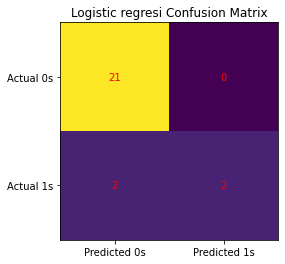

In [46]:
# Menghitung confusion matrix dengan y_test dan model1
confMLR = confusion_matrix(y_test,model1_pred)

# Membuat subplot dengan ukuran 4x4
fig,ax = plt.subplots(figsize=(4,4))

# Memberikan judul pada plot
plt.title("Logistic regresi Confusion Matrix")

# Menampilkan gambar dari confusion matrix
ax.imshow(confMLR)

# Menonaktifkan grid pada plot
ax.grid(False)

# Mengatur label sumbu x dan y pada plot
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))

# Mengatur batasan nilai pada sumbu y
ax.set_ylim(1.5,-0.5)

# Menambahkan teks angka pada setiap sel dalam confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMLR[i,j],ha='center',va='center',color='red')

# Menampilkan plot
plt.show()

_Keterangan_

True Negative terdapat [0,0] 

>21 data sebagai negatif (kelas 0) yang sebenarnya juga negatif (kelas 0)

False Positive terdapat [1,0] 

> 2 data sebagai positif (kelas 1) yang sebenarnya seharusnya negatif (kelas 0), sehingga dianggap sebagai False Positive (FP).

False Negative terdapat [0,1] 
> 0 data sebagai negatif (kelas 0) yang sebenarnya seharusnya positif (kelas 1), sehingga dianggap sebagai False Negative (FN).

True Positive [1,1]

> 2 data sebagai positif (kelas 1) yang sebenarnya juga positif (kelas 1), sehingga dianggap sebagai True Positive (TP).

confusion matrix Logistic Regresi ini adalah model memiliki hasil yang baik dalam mengklasifikasikan data negatif (TN yang besar) dan data positif (TP yang ada). 

### KNN CONFUSIN MATRIX

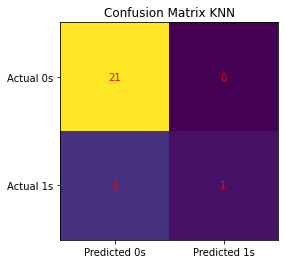

In [40]:
# Menghitung confusion matrix dengan model2
confMKNN = confusion_matrix(y_test, model2_pred)

# Membuat subplot dengan ukuran 4x4
fig, ax = plt.subplots(figsize=(4,4))

# Memberikan judul pada plot
plt.title("Confusion Matrix KNN")

# Menampilkan gambar dari confusion matrix
ax.imshow(confMKNN)

# Menonaktifkan grid pada plot
ax.grid(False)

# Mengatur label sumbu x dan y pada plot
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))

# Mengatur batasan nilai pada sumbu y
ax.set_ylim(1.5,-0.5)

# Menambahkan teks angka pada setiap sel dalam confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMKNN[i,j],ha='center',va='center',color='red')

# Menampilkan plot
plt.show()

_Keterangan_

True Negative terdapat [0,0] 

>21 data sebagai negatif (kelas 0) yang sebenarnya juga negatif (kelas 0)

False Positive terdapat [1,0] 

> 3 data sebagai positif (kelas 1) yang sebenarnya seharusnya negatif (kelas 0), sehingga dianggap sebagai False Positive (FP).

False Negative terdapat [0,1] 
> 0 data sebagai negatif (kelas 0) yang sebenarnya seharusnya positif (kelas 1), sehingga dianggap sebagai False Negative (FN).

True Positive [1,1]

> 1 data sebagai positif (kelas 1) yang sebenarnya juga positif (kelas 1), sehingga dianggap sebagai True Positive (TP).

confusion matrix ini adalah model memiliki hasil yang baik dalam mengklasifikasikan data negatif (TN yang besar), namun memiliki beberapa kesalahan dalam mengklasifikasikan data positif (FP yang ada) dan TP yang rendah.

### SVM Conffusin Matrix

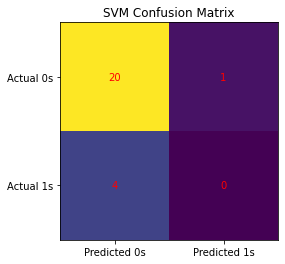

In [42]:
# Menghitung confusion matrix dengan model3
confSVM = confusion_matrix(y_test, model3_pred)

# Membuat subplot dengan ukuran 4x4
fig, ax = plt.subplots(figsize=(4,4))

# Memberikan judul pada plot
plt.title("SVM Confusion Matrix")

# Menampilkan gambar dari confusion matrix
ax.imshow(confSVM)

# Menonaktifkan grid pada plot
ax.grid(False)

# Mengatur label sumbu x dan y pada plot
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))

# Mengatur batasan nilai pada sumbu y
ax.set_ylim(1.5,-0.5)

# Menambahkan teks angka pada setiap sel dalam confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j,i,confSVM[i,j],ha='center',va='center',color='red')

# Menampilkan plot
plt.show()

_Keterangan_

True Negative terdapat [0,0] 

>21 data sebagai negatif (kelas 0) yang sebenarnya juga negatif (kelas 0)

False Positive terdapat [1,0] 

> 4 data sebagai positif (kelas 1) yang sebenarnya seharusnya negatif (kelas 0), sehingga dianggap sebagai False Positive (FP).

False Negative terdapat [0,1] 
> 1 data sebagai negatif (kelas 0) yang sebenarnya seharusnya positif (kelas 1), sehingga dianggap sebagai False Negative (FN).

True Positive [1,1]

> 0 data sebagai positif (kelas 1) yang sebenarnya juga positif (kelas 1), sehingga dianggap sebagai True Positive (TP).

confusion matrix SVM ini adalah model memiliki masalah dalam memprediksi data yang sebenarnya negatif dan positif,

### DECISION TREE CONFUSION MATRIX

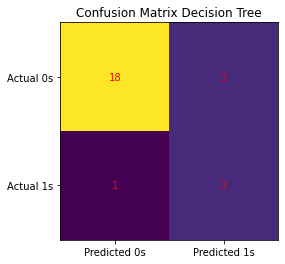

In [35]:
# Menghitung confusion model4
confMDt = confusion_matrix(y_test, model4_pred)

# Membuat subplot dengan ukuran 4x4
fig, ax = plt.subplots(figsize=(4,4))

# Memberikan judul pada plot
plt.title("Confusion Matrix Decision Tree")

# Menampilkan gambar dari confusion matrix
ax.imshow(confMDt)

# Menonaktifkan grid pada plot
ax.grid(False)

# Mengatur label sumbu x dan y pada plot
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))

# Mengatur batasan nilai pada sumbu y
ax.set_ylim(1.5,-0.5)

# Menambahkan teks angka pada setiap sel dalam confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMDt[i,j],ha='center',va='center',color='red')

# Menampilkan plot
plt.show()

_Keterangan_

True Negative terdapat [0,0] 

>18 data sebagai negatif (kelas 0) yang sebenarnya juga negatif (kelas 0)

False Positive terdapat [1,0] 

> 1 data sebagai positif (kelas 1) yang sebenarnya seharusnya negatif (kelas 0), sehingga dianggap sebagai False Positive (FP).

False Negative terdapat [0,1] 
> 3 data sebagai negatif (kelas 0) yang sebenarnya seharusnya positif (kelas 1), sehingga dianggap sebagai False Negative (FN).

True Positive [1,1]

> 3 data sebagai positif (kelas 1) yang sebenarnya juga positif (kelas 1), sehingga dianggap sebagai True Positive (TP).

confusion matrix Decision Tree ini adalah model memiliki kinerja yang cukup baik dalam memprediksi data yang sebenarnya negatif dan positif, namun masih terdapat beberapa kasus di mana model salah memprediksi data yang sebenarnya positif sebagai negatif.

### Random Forest Confussion Matrix

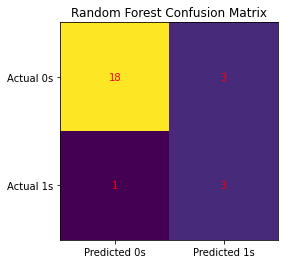

In [43]:

# Menghitung confusion matrix model5
confMRf = confusion_matrix(y_test, model5_pred)

# Membuat subplot dengan ukuran 4x4
fig, ax = plt.subplots(figsize=(4,4))

# Memberikan judul pada plot
plt.title("Random Forest Confusion Matrix")

# Menampilkan gambar dari confusion matrix
ax.imshow(confMRf)

# Menonaktifkan grid pada plot
ax.grid(False)

# Mengatur label sumbu x dan y pada plot
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))

# Mengatur batasan nilai pada sumbu y
ax.set_ylim(1.5,-0.5)

# Menambahkan teks angka pada setiap sel dalam confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMRf[i,j],ha='center',va='center',color='red')

# Menampilkan plot
plt.show()

_Keterangan_

True Negative terdapat [0,0] 

>18 data sebagai negatif (kelas 0) yang sebenarnya juga negatif (kelas 0)

False Positive terdapat [1,0] 

> 1 data sebagai positif (kelas 1) yang sebenarnya seharusnya negatif (kelas 0), sehingga dianggap sebagai False Positive (FP).

False Negative terdapat [0,1] 
> 3 data sebagai negatif (kelas 0) yang sebenarnya seharusnya positif (kelas 1), sehingga dianggap sebagai False Negative (FN).

True Positive [1,1]

> 3 data sebagai positif (kelas 1) yang sebenarnya juga positif (kelas 1), sehingga dianggap sebagai True Positive (TP).

 confusion matrix random Forest ini adalah model memiliki kinerja yang cukup baik dalam memprediksi data yang sebenarnya negatif dan positif, namun masih terdapat beberapa kasus di mana model salah memprediksi data yang sebenarnya positif sebagai negatif.

### Naive bayes Coinffusin Matrix

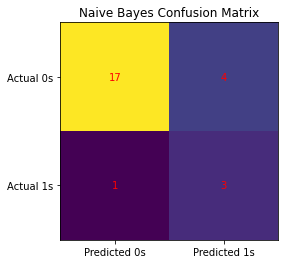

In [44]:
# Menghitung confusion matrix model 6
confMNb = confusion_matrix(y_test, model6_pred)

# Membuat subplot dengan ukuran 4x4
fig, ax = plt.subplots(figsize=(4,4))

# Memberikan judul pada plot
plt.title("Naive Bayes Confusion Matrix")

# Menampilkan gambar dari confusion matrix
ax.imshow(confMNb)

# Menonaktifkan grid pada plot
ax.grid(False)

# Mengatur label sumbu x dan y pada plot
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))

# Mengatur batasan nilai pada sumbu y
ax.set_ylim(1.5,-0.5)

# Menambahkan teks angka pada setiap sel dalam confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMNb[i,j],ha='center',va='center',color='red')

# Menampilkan plot
plt.show()

_Keterangan_

True Negative terdapat [0,0] 

>17 data sebagai negatif (kelas 0) yang sebenarnya juga negatif (kelas 0)

False Positive terdapat [1,0] 

> 1 data sebagai positif (kelas 1) yang sebenarnya seharusnya negatif (kelas 0), sehingga dianggap sebagai False Positive (FP).

False Negative terdapat [0,1] 
> 4 data sebagai negatif (kelas 0) yang sebenarnya seharusnya positif (kelas 1), sehingga dianggap sebagai False Negative (FN).

True Positive [1,1]

> 3 data sebagai positif (kelas 1) yang sebenarnya juga positif (kelas 1), sehingga dianggap sebagai True Positive (TP).

confusion matrix Naive byes ini adalah model memiliki kinerja yang cukup baik dalam memprediksi data yang sebenarnya negatif, namun masih memiliki beberapa kesalahan dalam memprediksi data yang sebenarnya positif. 

# Kesimpulan

Akurasi pada masing masing modeling diataranya

In [50]:
print("Akurasi dari Model 1 ( Logistic Regression ) sebesar:", accuracyModel1*100)
print("Akurasi dari Model 2 ( KNN ) sebesar:", accuracyModel2*100)
print("Akurasi dari Model 3 ( SVM ) sebesar:", accuracyModel3*100)
print("Akurasi dari Model 4 ( Decision Tree ) sebesar:", accuracyModel4*100)
print("Akurasi dari Model 5 ( Random Forest ) sebesar:", accuracyModel5*100)
print("Akurasi dari Model 6 ( Naive Bayes) sebesar:", accuracyModel6*100)

Akurasi dari Model 1 ( Logistic Regression ) sebesar: 92.0
Akurasi dari Model 2 ( KNN ) sebesar: 88.0
Akurasi dari Model 3 ( SVM ) sebesar: 80.0
Akurasi dari Model 4 ( Decision Tree ) sebesar: 84.0
Akurasi dari Model 5 ( Random Forest ) sebesar: 84.0
Akurasi dari Model 6 ( Naive Bayes) sebesar: 80.0


Dari keenam model diatas yang memiliki akurasi tertinggi adalah model Logistic Regresion yang didukung juga dengan hasil dari konfusin matrixnya yang "confusion matrix Logistic Regresi ini adalah model memiliki hasil yang baik dalam mengklasifikasikan data negatif (TN yang besar) dan data positif (TP yang ada)". 

SELESAI